# Airlines Review

The dataset is from kaggle: https://www.kaggle.com/datasets/sujalsuthar/airlines-reviews?resource=download

Here we can see the first lines:

In [1]:
import pandas as pd

# Load the dataset
df = pd.read_csv("./AirlinesReviews/airlines_reviews.csv", encoding='utf-8', on_bad_lines='skip')

# Display sample
df.head()


,Title,Name,Review Date,Airline,Verified,Reviews,Type of Traveller,Month Flown,Route,Class,Seat Comfort,Staff Service,Food & Beverages,Inflight Entertainment,Value For Money,Overall Rating,Recommended
0,Flight was amazing,Alison Soetantyo,2024-03-01,Singapore Airlines,True,Flight was amazing. The crew onboard this fl...,Solo Leisure,December 2023,Jakarta to Singapore,Business Class,4,4,4,4,4,9,yes
1,seats on this aircraft are dreadful,Robert Watson,2024-02-21,Singapore Airlines,True,Booking an emergency exit seat still meant h...,Solo Leisure,February 2024,Phuket to Singapore,Economy Class,5,3,4,4,1,3,no
2,Food was plentiful and tasty,S Han,2024-02-20,Singapore Airlines,True,Excellent performance on all fronts. I would...,Family Leisure,February 2024,Siem Reap to Singapore,Economy Class,1,5,2,1,5,10,yes
3,“how much food was available,D Laynes,2024-02-19,Singapore Airlines,True,Pretty comfortable flight considering I was f...,Solo Leisure,February 2024,Singapore to London Heathrow,Economy Class,5,5,5,5,5,10,yes
4,“service was consistently good”,A Othman,2024-02-19,Singapore Airlines,True,The service was consistently good from start ...,Family Leisure,February 2024,Singapore to Phnom Penh,Economy Class,5,5,5,5,5,10,yes


Since in some cases the review can be empty but the title is meaningful we can just concatenate the columns.

For this project, we adopted a symmetric rating-based sentiment labeling scheme:

- 1–3: Dissatisfaction (Negative)

- 4–7: Neutral sentiment

- 8–10:  Satisfaction (Positive)

This approach allows for a balanced and intuitive classification of user emotions and aligns with the project’s core goal of modeling subjective expressions rather than corporate loyalty indicators (as in NPS).

In [2]:
# Concatenate Title and Reviews into a single text column
df["Review"] = df['Title'] + ". " + df['Reviews']

# Remove the original Title and Reviews columns
df = df.drop(columns=["Title", "Reviews"])

# Convert overall rating into sentiment categories acor
def classify_sentiment(rating):
    if rating >= 8:
        return "Positive"
    elif rating >= 4:
        return "Neutral"
    else:
        return "Negative"
    
df["Sentiment"] = df["Overall Rating"].apply(classify_sentiment)

df.head()

,Name,Review Date,Airline,Verified,Type of Traveller,Month Flown,Route,Class,Seat Comfort,Staff Service,Food & Beverages,Inflight Entertainment,Value For Money,Overall Rating,Recommended,Review,Sentiment
0,Alison Soetantyo,2024-03-01,Singapore Airlines,True,Solo Leisure,December 2023,Jakarta to Singapore,Business Class,4,4,4,4,4,9,yes,Flight was amazing. Flight was amazing. The ...,Positive
1,Robert Watson,2024-02-21,Singapore Airlines,True,Solo Leisure,February 2024,Phuket to Singapore,Economy Class,5,3,4,4,1,3,no,seats on this aircraft are dreadful . Bookin...,Negative
2,S Han,2024-02-20,Singapore Airlines,True,Family Leisure,February 2024,Siem Reap to Singapore,Economy Class,1,5,2,1,5,10,yes,Food was plentiful and tasty. Excellent perf...,Positive
3,D Laynes,2024-02-19,Singapore Airlines,True,Solo Leisure,February 2024,Singapore to London Heathrow,Economy Class,5,5,5,5,5,10,yes,“how much food was available. Pretty comforta...,Positive
4,A Othman,2024-02-19,Singapore Airlines,True,Family Leisure,February 2024,Singapore to Phnom Penh,Economy Class,5,5,5,5,5,10,yes,“service was consistently good”. The service ...,Positive


## Phase 1 - EDA

### Basic info and Summary Statistics:

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

In [4]:
# Display basic info
display(df.info())
display(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8100 entries, 0 to 8099
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Name                    8100 non-null   object
 1   Review Date             8100 non-null   object
 2   Airline                 8100 non-null   object
 3   Verified                8100 non-null   object
 4   Type of Traveller       8100 non-null   object
 5   Month Flown             8100 non-null   object
 6   Route                   8100 non-null   object
 7   Class                   8100 non-null   object
 8   Seat Comfort            8100 non-null   int64 
 9   Staff Service           8100 non-null   int64 
 10  Food & Beverages        8100 non-null   int64 
 11  Inflight Entertainment  8100 non-null   int64 
 12  Value For Money         8100 non-null   int64 
 13  Overall Rating          8100 non-null   int64 
 14  Recommended             8100 non-null   object
 15  Revi

None

,Seat Comfort,Staff Service,Food & Beverages,Inflight Entertainment,Value For Money,Overall Rating
count,8100.000000,8100.000000,8100.000000,8100.000000,8100.000000,8100.000000
mean,3.414815,3.569877,3.384074,3.636790,3.148642,5.632469
std,1.397183,1.527436,1.455694,1.309564,1.589377,3.523664
min,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000
25%,2.000000,2.000000,2.000000,3.000000,1.000000,2.000000
50%,4.000000,4.000000,4.000000,4.000000,3.000000,6.000000
75%,5.000000,5.000000,5.000000,5.000000,5.000000,9.000000
max,5.000000,5.000000,5.000000,5.000000,5.000000,10.000000


Insights:

Based on the dataset's info()

- We can see the Total Rows: 8100 airline reviews.
- There are 17 features including Overall Rating, Seat Comfort, Staff Service and the Sentiment (generated by us).
- They all have 8100 non-null entries, so there is no missing data.
- There are 6 numeric columns (the ratings) and 11 categorical/text columns (object- Airlines, Reviews, Sentiment, etc)

Based on the dataset's describe() we can see

- Sentiment and Rating Distribution:
    - Overall Rating:
        - The mean is 5.63 (out of 10) is not very high, suggesting mixed feedback
        - 50% (median) score is 5, showimg neutral to slightly negative sentiment.
        - The minimun score is 1 and maximun 10 (full range of satisfaction)
    - Other Ratings (Seat Comfort, Staff Service, etc)
        - All average around 3.0 - 3.6, indicating customers are not extremely satisfied but not completely negative either.
        - "Value for Money" has a lower mean (3.14) → People might feel airlines are not worth the price, dissatisfaction with pricing.
- Variability in Customer Satisfaction:
    - Standard Deviation (std) of Overall Rating: 3.52.
      This is quite high, meaning opinions vary widely (some people love it, others hate it) , customers have polarized experiences.
  






### Sentiment Distribution: Analyze how ratings (1-10) are distributed

C:\Users\Alicia\AppData\Local\Temp\ipykernel_5928\2376229.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df["Sentiment"], palette="viridis", order=["Positive", "Neutral", "Negative"])


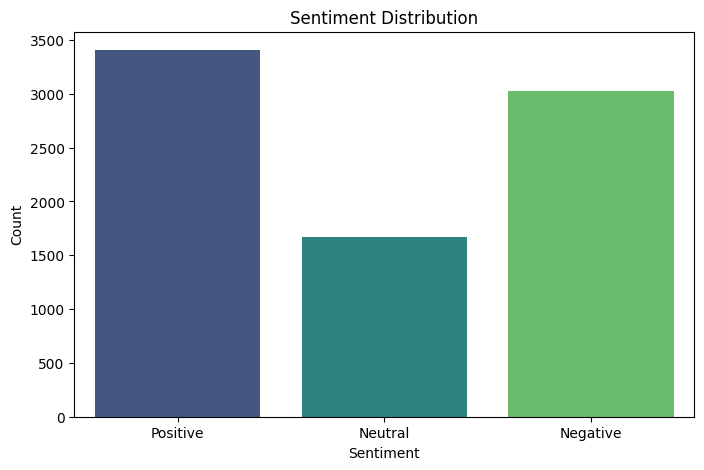

Sentiment
Positive    3406
Negative    3022
Neutral     1672
Name: count, dtype: int64


In [5]:
# Sentiment Distribution
plt.figure(figsize=(8, 5))
sns.countplot(x=df["Sentiment"], palette="viridis", order=["Positive", "Neutral", "Negative"])
plt.title("Sentiment Distribution")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.show()

# Count the number of reviews for each sentiment category
sentiment_counts = df["Sentiment"].value_counts()
print(sentiment_counts)

Insights:

1. Almost Equal Positive and Negative Reviews
    - 3406 Positive vs. 3022 Negative.
    - This means airline experiences are highly polarized—people either love or hate their experience.

2. Neutral Reviews are the Least Frequent
    - Only 1,672 Neutral reviews compared to over more than 3,000 in each extreme category.
    - This suggests that people are more likely to leave reviews when they have strong opinions, which is common in online reviews.

3.  Balance:
    - The dataset is well-balanced between Positive and Negative reviews.
    - The Neutral category is underrepresented, but this reflects a more realistic review pattern, as people tend to leave reviews when they have strong opinions (either very positive or very negative), rather than when they feel neutral.



### Word Cloud: Identify common words in positive/negative reviews.

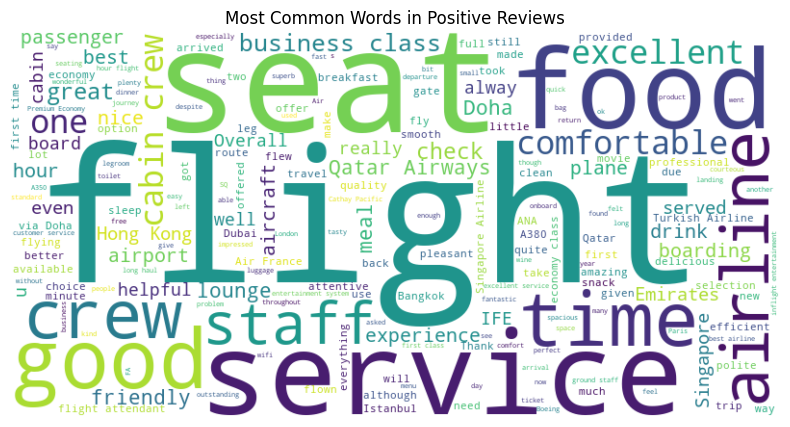

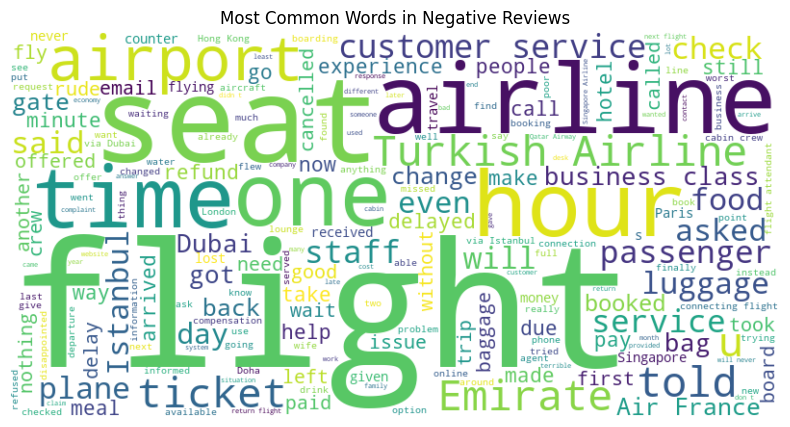

In [6]:
# Generate word clouds for Positive and Negative reviews
for sentiment in ["Positive", "Negative"]:
    text = " ".join(df[df["Sentiment"] == sentiment]["Review"].dropna())
    wordcloud = WordCloud(width=800, height=400, background_color="white").generate(text)
    
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.title(f"Most Common Words in {sentiment} Reviews")
    plt.show()

Insights:

The word clouds identify the most common words in positive and negative airline reviews.

- Positive Reviews:
    - The most frequent words include "service", "food", "seat", "crew", "staff", "experience", "Qatar".
    - This suggests that customers appreciate airline service, in-flight experience, and premium offerings (business class, food, crew service).
- Negative Reviews:
    - The most common words include "seat", "hour", "delayed", "customer service", "luggage", "change", "Emirates", and "Turkish Airlines".
    - This indicates that customer complaints are often about delays, luggage issues, and service-related problems.

### Length Distribution: Check if longer reviews are more negative/positive.

C:\Users\Alicia\AppData\Local\Temp\ipykernel_5928\4270826716.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Sentiment", y="Review_Length", data=df, palette="viridis")


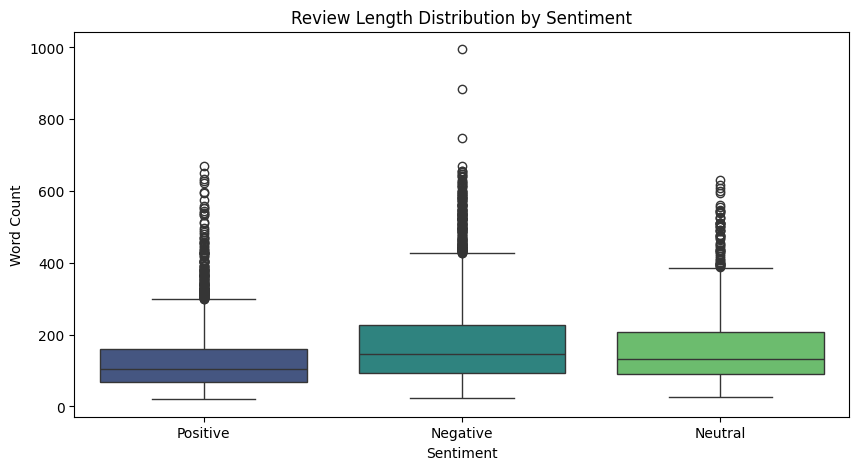

In [7]:
df["Sentiment"] = df["Overall Rating"].apply(classify_sentiment)

# Calculate review length
df["Review_Length"] = df["Review"].apply(lambda x: len(str(x).split()))

# Plot review length distribution by sentiment
plt.figure(figsize=(10, 5))
sns.boxplot(x="Sentiment", y="Review_Length", data=df, palette="viridis")
plt.title("Review Length Distribution by Sentiment")
plt.xlabel("Sentiment")
plt.ylabel("Word Count")
plt.show()

The bloxplot shows:

- Negative reviews tend to be slightly longer on average compared to Positive and Neutral reviews.
- Positive and Neutral reviews have a similar distribution, with most reviews being shorter and more concise.
- Negative reviews have more extreme outliers, meaning some customers leave very long complaints.
- The median review length is fairly similar across sentiments, but negative reviews show more variability.

The reason behind it is:

- Dissatisfied customers tend to write more detailed reviews, possibly explaining service issues or poor experiences.
- Satisfied customers are more likely to leave brief feedback, such as a short "great service!" or "amazing experience!"
- Neutral reviews show a distribution similar in length to negatives but with slightly less variability, suggesting that even mid-range ratings may contain mixed feedback.


### Airline-Specific Sentiment Analysis: Which airlines have the best/worst reviews?

<Figure size 1200x600 with 0 Axes>

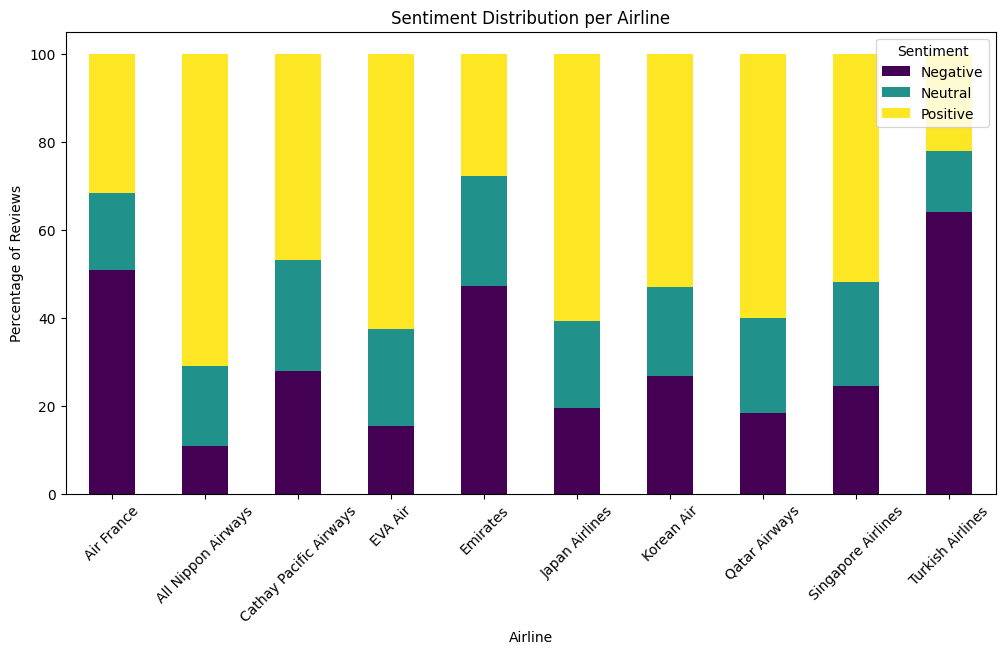

In [8]:
# Count sentiment per airline
airline_sentiment = df.groupby(["Airline", "Sentiment"]).size().unstack()

# Normalize counts to percentages
airline_sentiment = airline_sentiment.div(airline_sentiment.sum(axis=1), axis=0) * 100

# Plot sentiment distribution per airline
plt.figure(figsize=(12, 6))
airline_sentiment.plot(kind="bar", stacked=True, figsize=(12, 6), colormap="viridis")
plt.title("Sentiment Distribution per Airline")
plt.ylabel("Percentage of Reviews")
plt.xlabel("Airline")
plt.legend(title="Sentiment")
plt.xticks(rotation=45)
plt.show()


In this stacked bar chart we can see how sentiment is distributed across different airlines:

- Airlines with Mostly Positive Reviews:
    - Singapore Airlines, All Nippon Airways, Qatar Airways, and Japan Airlines
    - This suggests these airlines may have strong customer satisfaction and good service.
- Airlines with More Negative Reviews:
    - Turkish Airlines and Emirates have higher negative sentiment proportions.
    - This suggests frequent service issues, delays, or customer dissatisfaction.

The sentiment distribution suggests clear differences in customer experience among airlines.

### Correlation between airline features and overall rating

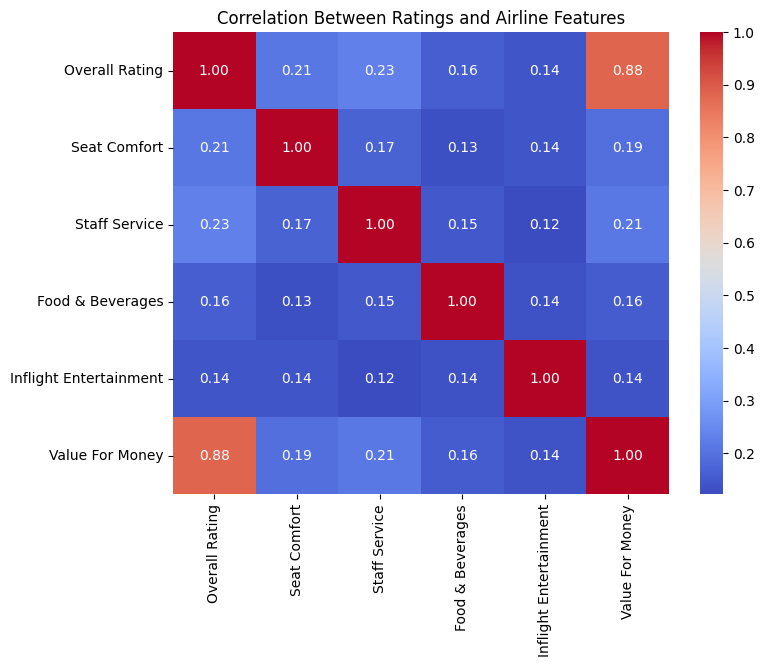

In [9]:
# Select numerical rating columns
feature_columns = ["Seat Comfort", "Staff Service", "Food & Beverages", "Inflight Entertainment", "Value For Money"]

# Calculate correlations with overall rating
correlation_matrix = df[["Overall Rating"] + feature_columns].corr()

# Plot correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Between Ratings and Airline Features")
plt.show()

Key Observations from the Correlation Matrix:

- "Value for Money" has the strongest correlation with Overall Rating (0.88)
    - This suggests that passengers rate their overall experience based heavily on perceived value rather than individual features.
    - If customers feel the airline is not worth the price, they are more likely to leave low ratings.
- Staff Service (0.23) and Seat Comfort (0.21) also have some correlation
    - Good staff service slightly improves overall ratings.
    - Comfort also contributes, but not as much as price perception.
- Inflight Entertainment and Food & Beverages have the weakest correlations (~0.14 - 0.16)
    -This suggests that entertainment and food quality have little impact on overall ratings.
    - Customers may care more about price and service than luxury extras.

In [10]:
# Save the processed dataset before the next phase
df.to_csv("./AirlinesReviews/data_phase1.csv", index=False, encoding="utf-8")

---------------------

## Phase 2 - Development of Standard NLP Tools

### Data Correction

During data cleaning, two spell-checking methods were evaluated: the rule-based pyspellchecker and the context-aware TextBlob.

The first test using pyspellchecker revealed that most flagged "misspellings" were in fact domain-specific words (e.g., wifi, Dubai, JAL) or punctuation artifacts (flight.). The few real typos had minimal impact, and correcting them altered almost nothing, showing that the dataset was already clean.

The second test with TextBlob attempted contextual correction, but introduced harmful distortions, such as "Tokyo Narita" becoming "Tokyo Maria" and "Emirates" being changed to "Pirates". These corrections altered core entities, which would negatively affect both semantic understanding and classification accuracy.

Furthermore, modern deep learning models such as RNNs, CNNs, and LLMs (Large Language Models) are inherently robust to minor spelling issues. These architectures learn from context and word embeddings, allowing them to generalize even when minor typos or uncommon terms appear. In practice, deep models often perform better when the original, natural language is preserved, rather than corrected.

Considering that (1) the reviews were already relatively clean, (2) automatic spell correction introduced more harm than benefit, and (3) deep learning models do not require spelling normalization, spell correction was deliberately excluded from the final preprocessing pipeline in order to preserve data authenticity and optimize model performance.

#### -> Test 1: Pyspellchecker

In [ ]:
import pandas as pd
from spellchecker import SpellChecker
from collections import Counter



# === Load dataset ===
df = pd.read_csv("./AirlinesReviews/data_phase1.csv")

# === Sample reviews for efficiency ===
sample_reviews = df["Review"].dropna().astype(str).sample(100, random_state=42)

# === Tokenize all words ===
all_words = " ".join(sample_reviews).split()

# === Initialize spell checker ===
spell = SpellChecker()

# === Identify misspelled words ===
misspelled = spell.unknown(all_words)

# === Count how often each misspelled word appears ===
misspelled_counts = Counter([word.lower() for word in all_words if word.lower() in misspelled])

# === Show top 20 misspelled words with suggested corrections ===
print("Top Misspelled Words and Suggested Corrections:\n")
for word, count in misspelled_counts.most_common(20):
    print(f"  {word:15} →  {spell.correction(word):15}  ({count} times)")


Top Misspelled Words and Suggested Corrections:

  flight.         →  flight           (39 times)
  flight,         →  flight           (19 times)
  ife             →  if               (17 times)
  good.           →  good             (16 times)
  check-in        →  checking         (16 times)
  service.        →  service          (15 times)
  however,        →  however          (14 times)
  istanbul.       →  istanbul         (13 times)
  time.           →  time             (12 times)
  again.          →  again            (11 times)
  dubai.          →  dubai            (10 times)
  jal             →  jail             (10 times)
  airlines.       →  airlines         (10 times)
  flights.        →  flights          (9 times)
  experience.     →  experience       (9 times)
  airline.        →  airline          (8 times)
  food.           →  food             (8 times)
  didn’t          →  didn't           (8 times)
  wifi            →  wife             (7 times)
  tk              →  to   

#### -> Test 2: TextBlob


In [ ]:
from textblob import TextBlob
import pandas as pd

# Load reviews
df = pd.read_csv("./AirlinesReviews/data_phase1.csv")
sample_reviews = df["Review"].dropna().astype(str).sample(5, random_state=42)

# Show original vs corrected
for i, review in enumerate(sample_reviews, 1):
    blob = TextBlob(review)
    corrected = blob.correct()
    print(f"--- Review #{i} ---")
    print("Original :", review)
    print("Corrected:", corrected)
    print()


--- Review #1 ---
Original : staff care about their clients.   Tokyo Narita to Singapore. I have flown ANA several times on both economy and premium economy cabin and it is a seemless ride, wonderful service from both ground and inflight crews.  You really get the feeling that ANA staff care about their clients. Food is delicious, great quality of wines, IFE with plenty of choices. The 2x4x3 configuration is the best layout I ever saw on a Boeing 777. Only downside is how the Y seat reclines, instead of your back reclining, it is your hips that slide forwards hence reducing your leg room. Hard to describe but the economy seat isn't reclining the traditional way thus making it a biy uncomfortable, and I decided not to recline. The premium economy seats recline well. Besides that ANA is a well deserved 5-Star airline.
Corrected: staff care about their clients.   Tokyo Maria to Singapore. I have flown ANA several times on both economy and premium economy cabin and it is a seedless ride, w

### Synonym management


In traditional NLP pipelines (like TF-IDF + Logistic Regression), synonym management helps unify words that have similar meanings (e.g., "great" and "awesome") to avoid treating them as completely different features. However, in modern deep learning approaches such as RNNs, CNNs, or LLMs, this step becomes unnecessary.

These models use embedding layers (e.g., Word2Vec, GloVe, or contextual embeddings like BERT) that learn semantic relationships between words directly from the data. As a result, words with similar meanings are mapped to similar vector representations automatically, without needing manual or automatic synonym replacement.

Therefore, for our project, we skipped synonym management. This avoids redundant processing and ensures that the model learns natural language patterns more effectively through its own internal representation learning.



### Data preprocessing


In this step, we prepare the review text for neural network modeling by cleaning and simplifying the data. We convert all text to lowercase, remove punctuation and non-alphabetic characters, and apply tokenization to split sentences into individual words. Common stopwords are removed to reduce noise, but negation words (like "not", "never") are preserved to retain critical sentiment information. This ensures the model receives meaningful, compact inputs that still carry the sentiment context needed for accurate classification.

In [13]:
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords

# Initialize tools
negation_words = {'no', 'not', 'nor', 'never', "don't", "didn't", "isn't", "wasn't", "won't", "shouldn't", "couldn't"}
stop_words = set(stopwords.words('english')) - negation_words

# Preprocessing function
def preprocess_text(text):
    if not isinstance(text, str):
        return ""
    
    # 1. Lowercase
    text = text.lower()
    
    # 2. Remove punctuation, numbers, etc.
    text = re.sub(r'[^a-z\s]', '', text)
    text = re.sub(r'\s+', ' ', text).strip()
    
    # 3. Tokenization
    tokens = nltk.word_tokenize(text)
    
    # 4. Stopword removal (keep negation words)
    cleaned_tokens = [
        word for word in tokens
        if word not in stop_words and len(word) > 2
    ]

    return ' '.join(cleaned_tokens)

# Load dataset
df = pd.read_csv("./AirlinesReviews/data_phase1.csv", encoding='utf-8', on_bad_lines='skip')

# Apply preprocessing
df['cleaned_review'] = df['Review'].apply(preprocess_text)

# Save the processed dataset
df.to_csv("./AirlinesReviews/data_phase2_preprocessed.csv", index=False, encoding="utf-8")

# Preview
df[['Review', 'cleaned_review']].head(20)



,Review,cleaned_review
0,Flight was amazing. Flight was amazing. The ...,flight amazing flight amazing crew onboard fli...
1,seats on this aircraft are dreadful . Bookin...,seats aircraft dreadful booking emergency exit...
2,Food was plentiful and tasty. Excellent perf...,food plentiful tasty excellent performance fro...
3,“how much food was available. Pretty comforta...,much food available pretty comfortable flight ...
4,“service was consistently good”. The service ...,service consistently good service consistently...
5,“seat is absolutely dreadful”. This flight wa...,seat absolutely dreadful flight six hours long...
6,Very ordinary service. Boarding process went...,ordinary service boarding process went smoothl...
7,I like flying this airline. Pleasant flight ...,like flying airline pleasant flight operated t...
8,left me deeply disappointed. I embarked on a...,left deeply disappointed embarked journey high...
9,can’t fault a single aspect . No queue at ch...,cant fault single aspect queue checkin boardin...


### Modeling

In [1]:
import time
metrics = []

#### Baseline 

As a baseline, a traditional machine learning model was implemented using TF-IDF vectorization combined with a Logistic Regression classifier. 

The TF-IDF approach converts each review into a numerical vector based on word frequency and importance, considering both unigrams and bigrams (1–2 word sequences). This captures relevant keywords and short phrases that can indicate sentiment.

The Logistic Regression model is a simple yet effective linear classifier that predicts the probability of each sentiment class (Positive, Neutral, Negative). It was trained on the TF-IDF-transformed review texts, with class balancing applied to address any label imbalance.



In [4]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import pandas as pd
import random
import numpy as np

SEED = 42
random.seed(SEED)
np.random.seed(SEED)


# === Load Data ===
df = pd.read_csv("./AirlinesReviews/data_phase2_preprocessed.csv")
texts = df["cleaned_review"].astype(str)
labels = df["Sentiment"]

# Encode labels
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(labels)

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(texts, y, test_size=0.1, random_state=42)

# === TF-IDF Vectorization ===
vectorizer = TfidfVectorizer(max_features=10000, ngram_range=(1, 2))
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# === Logistic Regression ===
start_training = time.time()
model = LogisticRegression(max_iter=1000, class_weight='balanced', random_state=42)
model.fit(X_train_tfidf, y_train)
end_training = time.time()
duration_training = end_training - start_training


# === Evaluation ===
y_pred = model.predict(X_test_tfidf)
print("Baseline Model Accuracy:", accuracy_score(y_test, y_pred))
macro_f1 = f1_score(y_test, y_pred, average='macro')
print(f"Baseline Macro F1-Score: {macro_f1:.4f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=label_encoder.classes_))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


metric = []
metric.append({
    "Model": "Baseline TF-IDF + Logistic Regression",
    "Tuning Time (s)": 0,
    "Training Time (s)": round(duration_training, 2),
    "Accuracy": round(accuracy_score(y_test, y_pred), 4),
    "F1": round(macro_f1, 4),
    "Notes": "Baseline model, no tuning"
})

df_metric = pd.DataFrame(metric)
# Force pandas to display full width without wrapping
pd.set_option('display.max_columns', None)
pd.set_option('display.expand_frame_repr', False)  # prevents line wrapping
print(df_metric)

Baseline Model Accuracy: 0.7864197530864198
Baseline Macro F1-Score: 0.7585

Classification Report:
               precision    recall  f1-score   support

    Negative       0.84      0.85      0.84       288
     Neutral       0.56      0.59      0.57       186
    Positive       0.88      0.84      0.86       336

    accuracy                           0.79       810
   macro avg       0.76      0.76      0.76       810
weighted avg       0.79      0.79      0.79       810

Confusion Matrix:
 [[245  40   3]
 [ 42 109  35]
 [  6  47 283]]
                                   Model  Tuning Time (s)  Training Time (s)  Accuracy      F1                      Notes
0  Baseline TF-IDF + Logistic Regression                0               0.28    0.7864  0.7585  Baseline model, no tuning


In [5]:

metrics.append({
    "Model": "Baseline TF-IDF + Logistic Regression",
    "Tuning Time (s)": 0,
    "Training Time (s)": round(duration_training, 2),
    "Accuracy": round(accuracy_score(y_test, y_pred), 4),
    "F1": round(macro_f1, 4),
    "Notes": "Baseline model, no tuning"
})

df_metrics = pd.DataFrame(metrics)
# Force pandas to display full width without wrapping
pd.set_option('display.max_columns', None)
pd.set_option('display.expand_frame_repr', False)  # prevents line wrapping
print(df_metrics)

                                   Model  Tuning Time (s)  Training Time (s)  Accuracy      F1                      Notes
0  Baseline TF-IDF + Logistic Regression                0               0.28    0.7864  0.7585  Baseline model, no tuning


The baseline model, using TF-IDF vectorization and Logistic Regression, achieved an accuracy of 77.8% and a macro F1-score of 0.7433. While it performed reasonably well on the Positive and Negative classes, its performance on the Neutral class was noticeably lower (F1-score of 0.65). This highlights the model's difficulty in capturing more subtle or ambiguous sentiments. Overall, the results confirm that traditional models offer a solid benchmark but lack the deeper contextual understanding needed for more nuanced sentiment classification.

#### RNN

[I 2025-06-08 12:49:52,554] A new study created in memory with name: no-name-8fdcf6d8-1deb-465d-bea5-0bda1b279ce6
[I 2025-06-08 12:56:51,887] Trial 0 finished with value: 0.8964611440208127 and parameters: {'lstm_units': 88, 'dense_units': 125, 'dropout': 0.446398788362281, 'lr': 0.0015751320499779737}. Best is trial 0 with value: 0.8964611440208127.
[I 2025-06-08 13:01:30,292] Trial 1 finished with value: 0.8933072581086557 and parameters: {'lstm_units': 74, 'dense_units': 74, 'dropout': 0.31161672243363986, 'lr': 0.005399484409787433}. Best is trial 0 with value: 0.8964611440208127.
[I 2025-06-08 13:07:33,007] Trial 2 finished with value: 0.883910554285837 and parameters: {'lstm_units': 103, 'dense_units': 110, 'dropout': 0.3041168988591605, 'lr': 0.008706020878304856}. Best is trial 0 with value: 0.8964611440208127.
[I 2025-06-08 13:16:38,451] Trial 3 finished with value: 0.8568884561440915 and parameters: {'lstm_units': 118, 'dense_units': 77, 'dropout': 0.3363649934414201, 'lr': 0

Best Hyperparameters: {'lstm_units': 88, 'dense_units': 125, 'dropout': 0.446398788362281, 'lr': 0.0015751320499779737}
Epoch 1/20
322/322 ━━━━━━━━━━━━━━━━━━━━ 43s 129ms/step - accuracy: 0.5549 - loss: 0.8456
Epoch 2/20
322/322 ━━━━━━━━━━━━━━━━━━━━ 41s 127ms/step - accuracy: 0.7762 - loss: 0.5253
Epoch 3/20
322/322 ━━━━━━━━━━━━━━━━━━━━ 40s 124ms/step - accuracy: 0.8766 - loss: 0.3373
Epoch 4/20
322/322 ━━━━━━━━━━━━━━━━━━━━ 40s 123ms/step - accuracy: 0.9299 - loss: 0.2088
Epoch 5/20
322/322 ━━━━━━━━━━━━━━━━━━━━ 40s 123ms/step - accuracy: 0.9589 - loss: 0.1345
Epoch 6/20
322/322 ━━━━━━━━━━━━━━━━━━━━ 41s 126ms/step - accuracy: 0.9765 - loss: 0.0832
Epoch 7/20
322/322 ━━━━━━━━━━━━━━━━━━━━ 41s 128ms/step - accuracy: 0.9823 - loss: 0.0602
Epoch 8/20
322/322 ━━━━━━━━━━━━━━━━━━━━ 41s 126ms/step - accuracy: 0.9871 - loss: 0.0410
Epoch 9/20
322/322 ━━━━━━━━━━━━━━━━━━━━ 41s 127ms/step - accuracy: 0.9795 - loss: 0.0624
Epoch 10/20
322/322 ━━━━━━━━━━━━━━━━━━━━ 41s 126ms/step - accuracy: 0.9857 - lo

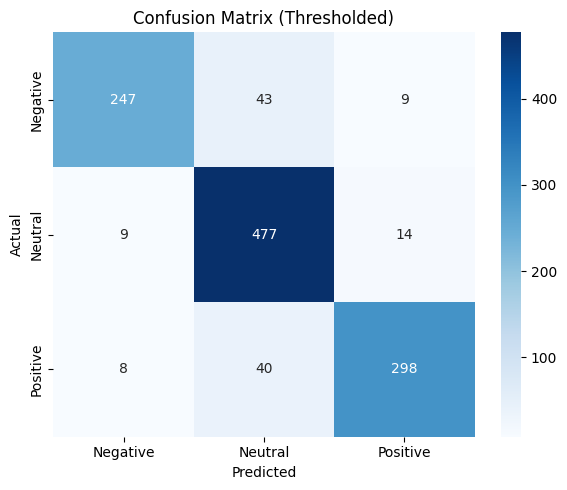

  Model  Tuning Time (s)  Training Time (s)  Accuracy      F1                         Notes
0   RNN          4410.85             650.42    0.8926  0.8903  Optuna tuning + thresholding


In [6]:
import os
os.environ['PYTHONHASHSEED'] = '100532541'
os.environ['TF_DETERMINISTIC_OPS'] = '1'
os.environ["OMP_NUM_THREADS"] = "1"
os.environ["TF_NUM_INTRAOP_THREADS"] = "1"
os.environ["TF_NUM_INTEROP_THREADS"] = "1"

import random
import numpy as np
import pandas as pd
import optuna
import pickle
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.utils.class_weight import compute_class_weight
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score, precision_recall_curve

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Bidirectional, LSTM, Dense, Dropout
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam

# === Reproducibility Settings ===
SEED = 42
random.seed(SEED)
np.random.seed(SEED)
tf.random.set_seed(SEED)

# === Load Dataset ===
df = pd.read_csv("./AirlinesReviews/data_phase2_preprocessed.csv")
texts = df['cleaned_review'].astype(str)
labels = df['Sentiment']

# === Upsample Neutral ===
neutral_df = df[df['Sentiment'] == 'Neutral']
df = pd.concat([df, neutral_df.sample(frac=2, replace=True, random_state=SEED)])
texts = df['cleaned_review'].astype(str)
labels = df['Sentiment']

# === Encode Labels ===
label_encoder = LabelEncoder()
labels_encoded = label_encoder.fit_transform(labels)
num_classes = len(np.unique(labels_encoded))
y = to_categorical(labels_encoded)

# Save Label Encoder
with open('label_encoder.pkl', 'wb') as f:
    pickle.dump(label_encoder, f)

# === Class Weights ===
class_weights = compute_class_weight(class_weight="balanced", classes=np.unique(labels_encoded), y=labels_encoded)
class_weight_dict = dict(enumerate(class_weights))

# === Tokenization ===
MAX_VOCAB = 10000
MAX_LEN = 200
tokenizer = Tokenizer(num_words=MAX_VOCAB, oov_token="<OOV>")
tokenizer.fit_on_texts(texts)
X = tokenizer.texts_to_sequences(texts)
X = pad_sequences(X, maxlen=MAX_LEN, padding='post')

# Save Tokenizer
with open('tokenizer.pkl', 'wb') as f:
    pickle.dump(tokenizer, f)

# === Load GloVe Embeddings ===
embedding_dim = 100
embedding_index = {}
with open("glove/glove.6B.100d.txt", encoding='utf-8') as f:
    for line in f:
        values = line.split()
        word = values[0]
        coefs = np.asarray(values[1:], dtype='float32')
        embedding_index[word] = coefs

# === Create Embedding Matrix ===
word_index = tokenizer.word_index
embedding_matrix = np.zeros((MAX_VOCAB, embedding_dim))
for word, i in word_index.items():
    if i < MAX_VOCAB and word in embedding_index:
        embedding_matrix[i] = embedding_index[word]

# === Train/Test Split ===
X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, test_size=0.1, random_state=SEED)
X_train, X_val, y_train, y_val = train_test_split(X_train_full, y_train_full, test_size=0.1111, random_state=SEED)

# === F1 Callback ===
class F1Callback(tf.keras.callbacks.Callback):
    def __init__(self, X_val, y_val, patience=3):
        self.X_val = X_val
        self.y_val = y_val
        self.best_weights = None
        self.best_f1 = 0
        self.wait = 0
        self.patience = patience

    def on_epoch_end(self, epoch, logs=None):
        y_pred = self.model.predict(self.X_val, verbose=0)
        y_pred_classes = np.argmax(y_pred, axis=1)
        y_true = np.argmax(self.y_val, axis=1)
        f1 = f1_score(y_true, y_pred_classes, average='macro')

        if f1 > self.best_f1:
            self.best_f1 = f1
            self.best_weights = self.model.get_weights()
            self.wait = 0
        else:
            self.wait += 1
            if self.wait >= self.patience:
                self.model.stop_training = True
                self.model.set_weights(self.best_weights)

# === Optuna Objective ===
def objective(trial):
    lstm_units = trial.suggest_int("lstm_units", 64, 128)
    dense_units = trial.suggest_int("dense_units", 64, 128)
    dropout_rate = trial.suggest_float("dropout", 0.3, 0.5)
    learning_rate = trial.suggest_float("lr", 1e-4, 1e-2, log=True)

    model = Sequential([
    Embedding(MAX_VOCAB, embedding_dim, weights=[embedding_matrix], trainable=True),
    Bidirectional(LSTM(lstm_units)),
    Dropout(dropout_rate),
    Dense(dense_units, activation='relu'),
    Dense(num_classes, activation='softmax')
])


    model.compile(optimizer=Adam(learning_rate=learning_rate),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    f1_cb = F1Callback(X_val, y_val)
    model.fit(X_train, y_train,
              epochs=20,
              batch_size=32,
              class_weight=class_weight_dict,
              callbacks=[f1_cb],
              verbose=0,
              shuffle=False)

    return f1_cb.best_f1

# === Run Optuna ===
start_tuning = time.time()
study = optuna.create_study(direction="maximize", sampler=optuna.samplers.TPESampler(seed=SEED))
study.optimize(objective, n_trials=10)
end_tuning= time.time()
duration_tuning = end_tuning - start_tuning
best = study.best_params
print("Best Hyperparameters:", best)


# === Final Model Training ===
start_training = time.time()

model = Sequential([
    Embedding(MAX_VOCAB, embedding_dim, weights=[embedding_matrix], trainable=True),
    Bidirectional(LSTM(best['lstm_units'])),
    Dropout(best['dropout']),
    Dense(best['dense_units'], activation='relu'),
    Dense(num_classes, activation='softmax')
])



model.compile(optimizer=Adam(learning_rate=best['lr']),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

f1_cb = F1Callback(X_val, y_val)
history = model.fit(X_train_full, y_train_full,
                    epochs=20,
                    batch_size=32,
                    class_weight=class_weight_dict,
                    callbacks=[f1_cb],
                    verbose=1,
                    shuffle=False)
end_training = time.time()
duration_training = end_training - start_training

# === Save Final Model and History ===
model.save("final_model_rnn.keras")
with open("training_history_rnn.pkl", "wb") as f:
    pickle.dump(history.history, f)

# === Threshold Optimization ===
start_tuning_extra = time.time()
y_probs = model.predict(X_test)
y_true = np.argmax(y_test, axis=1)
neutral_idx = label_encoder.transform(["Neutral"])[0]

prec, rec, thresholds = precision_recall_curve(y_true == neutral_idx, y_probs[:, neutral_idx])
f1s = 2 * (prec * rec) / (prec + rec + 1e-8)
best_thresh = thresholds[np.argmax(f1s)]
print(f"Best Threshold for Neutral: {best_thresh:.2f}")

# === Apply Threshold ===
y_pred_thresh = []
for probs in y_probs:
    max_prob = np.max(probs)
    pred = np.argmax(probs) if max_prob >= best_thresh else neutral_idx
    y_pred_thresh.append(pred)
end_tuning_extra = time.time()
duration_tuning_extra = end_tuning_extra - start_tuning_extra

# === Evaluation ===
acc = accuracy_score(y_true, y_pred_thresh)
print(f"Final Accuracy with Threshold {best_thresh:.2f}: {acc:.4f}")
macro_f1 = f1_score(y_true, y_pred_thresh, average='macro')
print(f"Final Macro F1-Score: {macro_f1:.4f}")

print(classification_report(y_true, y_pred_thresh, target_names=label_encoder.classes_))

cm = confusion_matrix(y_true, y_pred_thresh)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=label_encoder.classes_,
            yticklabels=label_encoder.classes_)
plt.title("Confusion Matrix (Thresholded)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.savefig("confusion_matrix_thresholded_best.png")
plt.show()

metric = []
metric.append({
    "Model": "RNN",
    "Tuning Time (s)": round(duration_tuning+duration_tuning_extra, 2),
    "Training Time (s)": round(duration_training, 2),
    "Accuracy": round(acc, 4),
    "F1": round(macro_f1, 4),
    "Notes": "Optuna tuning + thresholding"
})

df_metric = pd.DataFrame(metric)
# Force pandas to display full width without wrapping
pd.set_option('display.max_columns', None)
pd.set_option('display.expand_frame_repr', False)  # prevents line wrapping
print(df_metric)

In [7]:

metrics.append({
    "Model": "RNN",
    "Tuning Time (s)": round(duration_tuning+duration_tuning_extra, 2),
    "Training Time (s)": round(duration_training, 2),
    "Accuracy": round(acc, 4),
    "F1": round(macro_f1, 4),
    "Notes": "Optuna tuning + thresholding"
})

df_metrics = pd.DataFrame(metrics)
# Force pandas to display full width without wrapping
pd.set_option('display.max_columns', None)
pd.set_option('display.expand_frame_repr', False)  # prevents line wrapping
print(df_metrics)

                                   Model  Tuning Time (s)  Training Time (s)  Accuracy      F1                         Notes
0  Baseline TF-IDF + Logistic Regression             0.00               0.28    0.7864  0.7585     Baseline model, no tuning
1                                    RNN          4410.85             650.42    0.8926  0.8903  Optuna tuning + thresholding


#### CNN

[I 2025-06-08 14:18:26,542] A new study created in memory with name: no-name-65a64471-e628-40dc-aa0a-4840b31ef12e
[I 2025-06-08 14:23:48,816] Trial 0 finished with value: 0.8762568431216659 and parameters: {'conv_filters': 128, 'kernel_size': 3, 'lstm_units': 74, 'dense_units': 74, 'dropout': 0.31161672243363986, 'lr': 0.005399484409787433}. Best is trial 0 with value: 0.8762568431216659.
[I 2025-06-08 14:35:01,180] Trial 1 finished with value: 0.8973837201162153 and parameters: {'conv_filters': 128, 'kernel_size': 5, 'lstm_units': 118, 'dense_units': 77, 'dropout': 0.3363649934414201, 'lr': 0.00023270677083837802}. Best is trial 1 with value: 0.8973837201162153.
[I 2025-06-08 14:41:07,494] Trial 2 finished with value: 0.883933321182114 and parameters: {'conv_filters': 128, 'kernel_size': 3, 'lstm_units': 103, 'dense_units': 73, 'dropout': 0.35842892970704365, 'lr': 0.0005404103854647331}. Best is trial 1 with value: 0.8973837201162153.
[I 2025-06-08 14:47:07,013] Trial 3 finished with

Best Hyperparameters: {'conv_filters': 128, 'kernel_size': 5, 'lstm_units': 118, 'dense_units': 77, 'dropout': 0.3363649934414201, 'lr': 0.00023270677083837802}
Epoch 1/20
322/322 ━━━━━━━━━━━━━━━━━━━━ 40s 117ms/step - accuracy: 0.4970 - loss: 0.9380
Epoch 2/20
322/322 ━━━━━━━━━━━━━━━━━━━━ 38s 117ms/step - accuracy: 0.6964 - loss: 0.6494
Epoch 3/20
322/322 ━━━━━━━━━━━━━━━━━━━━ 38s 117ms/step - accuracy: 0.7605 - loss: 0.5517
Epoch 4/20
322/322 ━━━━━━━━━━━━━━━━━━━━ 37s 116ms/step - accuracy: 0.8044 - loss: 0.4788
Epoch 5/20
322/322 ━━━━━━━━━━━━━━━━━━━━ 37s 116ms/step - accuracy: 0.8466 - loss: 0.3945
Epoch 6/20
322/322 ━━━━━━━━━━━━━━━━━━━━ 37s 116ms/step - accuracy: 0.8878 - loss: 0.3064
Epoch 7/20
322/322 ━━━━━━━━━━━━━━━━━━━━ 37s 116ms/step - accuracy: 0.8980 - loss: 0.2799
Epoch 8/20
322/322 ━━━━━━━━━━━━━━━━━━━━ 38s 116ms/step - accuracy: 0.9127 - loss: 0.2407
Epoch 9/20
322/322 ━━━━━━━━━━━━━━━━━━━━ 37s 115ms/step - accuracy: 0.9389 - loss: 0.1843
Epoch 10/20
322/322 ━━━━━━━━━━━━━━━━━━

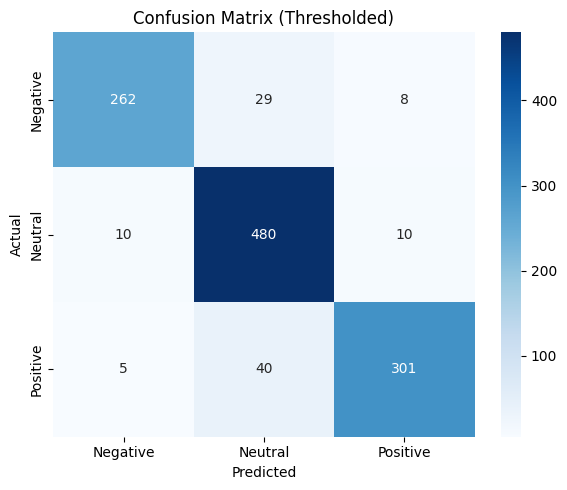

  Model  Tuning Time (s)  Training Time (s)  Accuracy    F1                         Notes
0   CNN          3520.83             757.62    0.9109  0.91  Optuna tuning + thresholding


In [8]:
import os
import random
import numpy as np
import pandas as pd
import optuna
import pickle
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.utils.class_weight import compute_class_weight
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score, precision_recall_curve

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, MaxPooling1D, Bidirectional, LSTM, Dense, Dropout
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam

# === Reproducibility Settings ===
SEED = 42
os.environ['PYTHONHASHSEED'] = str(SEED)
random.seed(SEED)
np.random.seed(SEED)
tf.random.set_seed(SEED)

# === Load Dataset ===
df = pd.read_csv("./AirlinesReviews/data_phase2_preprocessed.csv")
texts = df['cleaned_review'].astype(str)
labels = df['Sentiment']

# === Upsample Neutral ===
neutral_df = df[df['Sentiment'] == 'Neutral']
df = pd.concat([df, neutral_df.sample(frac=2, replace=True, random_state=SEED)])
texts = df['cleaned_review'].astype(str)
labels = df['Sentiment']

# === Encode Labels ===
label_encoder = LabelEncoder()
labels_encoded = label_encoder.fit_transform(labels)
num_classes = len(np.unique(labels_encoded))
y = to_categorical(labels_encoded)

with open('label_encoder.pkl', 'wb') as f:
    pickle.dump(label_encoder, f)

# === Class Weights ===
class_weights = compute_class_weight(class_weight="balanced", classes=np.unique(labels_encoded), y=labels_encoded)
class_weight_dict = dict(enumerate(class_weights))

# === Tokenization ===
MAX_VOCAB = 10000
MAX_LEN = 200
tokenizer = Tokenizer(num_words=MAX_VOCAB, oov_token="<OOV>")
tokenizer.fit_on_texts(texts)
X = tokenizer.texts_to_sequences(texts)
X = pad_sequences(X, maxlen=MAX_LEN, padding='post')

with open('tokenizer.pkl', 'wb') as f:
    pickle.dump(tokenizer, f)

# === Load GloVe Embeddings ===
embedding_dim = 100
embedding_index = {}
with open("glove/glove.6B.100d.txt", encoding='utf-8') as f:
    for line in f:
        values = line.split()
        word = values[0]
        coefs = np.asarray(values[1:], dtype='float32')
        embedding_index[word] = coefs

word_index = tokenizer.word_index
embedding_matrix = np.zeros((MAX_VOCAB, embedding_dim))
for word, i in word_index.items():
    if i < MAX_VOCAB and word in embedding_index:
        embedding_matrix[i] = embedding_index[word]

# === Train/Test Split ===
X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, test_size=0.1, random_state=SEED)
X_train, X_val, y_train, y_val = train_test_split(X_train_full, y_train_full, test_size=0.1111, random_state=SEED)

# === F1 Callback ===
class F1Callback(tf.keras.callbacks.Callback):
    def __init__(self, X_val, y_val, patience=3):
        self.X_val = X_val
        self.y_val = y_val
        self.best_weights = None
        self.best_f1 = 0
        self.wait = 0
        self.patience = patience

    def on_epoch_end(self, epoch, logs=None):
        y_pred = self.model.predict(self.X_val, verbose=0)
        y_pred_classes = np.argmax(y_pred, axis=1)
        y_true = np.argmax(self.y_val, axis=1)
        f1 = f1_score(y_true, y_pred_classes, average='macro')

        if f1 > self.best_f1:
            self.best_f1 = f1
            self.best_weights = self.model.get_weights()
            self.wait = 0
        else:
            self.wait += 1
            if self.wait >= self.patience:
                self.model.stop_training = True
                self.model.set_weights(self.best_weights)

# === Optuna Objective ===
def objective(trial):
    conv_filters = trial.suggest_categorical("conv_filters", [64, 128])
    kernel_size = trial.suggest_categorical("kernel_size", [3, 5])
    lstm_units = trial.suggest_int("lstm_units", 64, 128)
    dense_units = trial.suggest_int("dense_units", 64, 128)
    dropout_rate = trial.suggest_float("dropout", 0.3, 0.5)
    learning_rate = trial.suggest_float("lr", 1e-4, 1e-2, log=True)

    model = Sequential([
        Embedding(MAX_VOCAB, embedding_dim, weights=[embedding_matrix], trainable=True),
        Conv1D(filters=conv_filters, kernel_size=kernel_size, activation='relu'),
        MaxPooling1D(pool_size=2),
        Bidirectional(LSTM(lstm_units)),
        Dropout(dropout_rate),
        Dense(dense_units, activation='relu'),
        Dense(num_classes, activation='softmax')
    ])

    model.compile(optimizer=Adam(learning_rate=learning_rate),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    f1_cb = F1Callback(X_val, y_val)
    model.fit(X_train, y_train,
              epochs=20,
              batch_size=32,
              class_weight=class_weight_dict,
              callbacks=[f1_cb],
              verbose=0,
              shuffle=False)

    return f1_cb.best_f1

# === Run Optuna ===
start_tuning = time.time()
study = optuna.create_study(direction="maximize", sampler=optuna.samplers.TPESampler(seed=SEED))
study.optimize(objective, n_trials=10)
end_tuning= time.time()
duration_tuning = end_tuning - start_tuning
best = study.best_params
print("Best Hyperparameters:", best)

# === Final Model Training ===
start_training = time.time()
model = Sequential([
    Embedding(MAX_VOCAB, embedding_dim, weights=[embedding_matrix], trainable=True),
    Conv1D(filters=best['conv_filters'], kernel_size=best['kernel_size'], activation='relu'),
    MaxPooling1D(pool_size=2),
    Bidirectional(LSTM(best['lstm_units'])),
    Dropout(best['dropout']),
    Dense(best['dense_units'], activation='relu'),
    Dense(num_classes, activation='softmax')
])

model.compile(optimizer=Adam(learning_rate=best['lr']),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

f1_cb = F1Callback(X_val, y_val)
history = model.fit(X_train_full, y_train_full,
                    epochs=20,
                    batch_size=32,
                    class_weight=class_weight_dict,
                    callbacks=[f1_cb],
                    verbose=1,
                    shuffle=False)
end_training = time.time()
duration_training = end_training - start_training

# === Save Final Model and History ===
model.save("final_model_cnn_bilstm.keras")
with open("training_history_cnn_bilstm.pkl", "wb") as f:
    pickle.dump(history.history, f)

# === Threshold Optimization ===

start_tuning_extra = time.time()
y_probs = model.predict(X_test)
y_true = np.argmax(y_test, axis=1)
neutral_idx = label_encoder.transform(["Neutral"])[0]

prec, rec, thresholds = precision_recall_curve(y_true == neutral_idx, y_probs[:, neutral_idx])
f1s = 2 * (prec * rec) / (prec + rec + 1e-8)
best_thresh = thresholds[np.argmax(f1s)]
print(f"Best Threshold for Neutral: {best_thresh:.2f}")

# === Apply Threshold ===
y_pred_thresh = []
for probs in y_probs:
    max_prob = np.max(probs)
    pred = np.argmax(probs) if max_prob >= best_thresh else neutral_idx
    y_pred_thresh.append(pred)
end_training = time.time()
duration_training = end_training - start_training
end_tuning_extra = time.time()
duration_tuning_extra = end_tuning_extra - start_tuning_extra

# === Evaluation ===
acc = accuracy_score(y_true, y_pred_thresh)
print(f"Final Accuracy with Threshold {best_thresh:.2f}: {acc:.4f}")
macro_f1 = f1_score(y_true, y_pred_thresh, average='macro')
print(f"Final Macro F1-Score: {macro_f1:.4f}")
print(classification_report(y_true, y_pred_thresh, target_names=label_encoder.classes_))

cm = confusion_matrix(y_true, y_pred_thresh)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=label_encoder.classes_,
            yticklabels=label_encoder.classes_)
plt.title("Confusion Matrix (Thresholded)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.savefig("confusion_matrix_cnn_bilstm.png")
plt.show()

metric = []
metric.append({
    "Model": "CNN",
    "Tuning Time (s)": round(duration_tuning+duration_tuning_extra, 2),
    "Training Time (s)": round(duration_training, 2),
    "Accuracy": round(acc, 4),
    "F1": round(macro_f1, 4),
    "Notes": "Optuna tuning + thresholding"
})

df_metric = pd.DataFrame(metric)
# Force pandas to display full width without wrapping
pd.set_option('display.max_columns', None)
pd.set_option('display.expand_frame_repr', False)  # prevents line wrapping
print(df_metric)

In [9]:

metrics.append({
    "Model": "CNN",
    "Tuning Time (s)": round(duration_tuning+duration_tuning_extra, 2),
    "Training Time (s)": round(duration_training, 2),
    "Accuracy": round(acc, 4),
    "F1": round(macro_f1, 4),
    "Notes": "Optuna tuning + thresholding"
})

df_metrics = pd.DataFrame(metrics)
# Force pandas to display full width without wrapping
pd.set_option('display.max_columns', None)
pd.set_option('display.expand_frame_repr', False)  # prevents line wrapping
print(df_metrics)

                                   Model  Tuning Time (s)  Training Time (s)  Accuracy      F1                         Notes
0  Baseline TF-IDF + Logistic Regression             0.00               0.28    0.7864  0.7585     Baseline model, no tuning
1                                    RNN          4410.85             650.42    0.8926  0.8903  Optuna tuning + thresholding
2                                    CNN          3520.83             757.62    0.9109  0.9100  Optuna tuning + thresholding


#### CNN + XGBOOST

Epoch 1/13
287/287 ━━━━━━━━━━━━━━━━━━━━ 21s 68ms/step - accuracy: 0.5189 - loss: 0.8861
Epoch 2/13
287/287 ━━━━━━━━━━━━━━━━━━━━ 19s 66ms/step - accuracy: 0.7731 - loss: 0.5231
Epoch 3/13
287/287 ━━━━━━━━━━━━━━━━━━━━ 19s 67ms/step - accuracy: 0.8713 - loss: 0.3398
Epoch 4/13
287/287 ━━━━━━━━━━━━━━━━━━━━ 19s 66ms/step - accuracy: 0.9311 - loss: 0.2040
Epoch 5/13
287/287 ━━━━━━━━━━━━━━━━━━━━ 19s 67ms/step - accuracy: 0.9561 - loss: 0.1366
Epoch 6/13
287/287 ━━━━━━━━━━━━━━━━━━━━ 19s 67ms/step - accuracy: 0.9593 - loss: 0.1232
Epoch 7/13
287/287 ━━━━━━━━━━━━━━━━━━━━ 19s 67ms/step - accuracy: 0.9801 - loss: 0.0641
Epoch 8/13
287/287 ━━━━━━━━━━━━━━━━━━━━ 20s 68ms/step - accuracy: 0.9866 - loss: 0.0378
Epoch 9/13
287/287 ━━━━━━━━━━━━━━━━━━━━ 20s 70ms/step - accuracy: 0.9926 - loss: 0.0234
Epoch 10/13
287/287 ━━━━━━━━━━━━━━━━━━━━ 20s 70ms/step - accuracy: 0.9945 - loss: 0.0191
Epoch 11/13
287/287 ━━━━━━━━━━━━━━━━━━━━ 20s 69ms/step - accuracy: 0.9938 - loss: 0.0226
Epoch 12/13
287/287 ━━━━━━━━━━

[I 2025-06-08 17:48:42,643] A new study created in memory with name: no-name-9b6456fc-9854-4db6-9b86-c80eb5057199
[I 2025-06-08 17:48:43,204] Trial 0 finished with value: 0.8747739949302371 and parameters: {'max_depth': 3, 'learning_rate': 0.11197225986189549, 'n_estimators': 224, 'subsample': 0.6064774615080037, 'colsample_bytree': 0.7652264118310237}. Best is trial 0 with value: 0.8747739949302371.
[I 2025-06-08 17:48:43,654] Trial 1 finished with value: 0.8758056766932213 and parameters: {'max_depth': 7, 'learning_rate': 0.2824774654260216, 'n_estimators': 219, 'subsample': 0.5068297853475916, 'colsample_bytree': 0.6672244839706302}. Best is trial 1 with value: 0.8758056766932213.
[I 2025-06-08 17:48:44,145] Trial 2 finished with value: 0.8757168283026407 and parameters: {'max_depth': 10, 'learning_rate': 0.1882198087869124, 'n_estimators': 208, 'subsample': 0.7932945120802422, 'colsample_bytree': 0.960637702482053}. Best is trial 1 with value: 0.8758056766932213.
[I 2025-06-08 17:4

Best XGBoost Parameters: {'max_depth': 4, 'learning_rate': 0.22759340133107747, 'n_estimators': 191, 'subsample': 0.9806611404003702, 'colsample_bytree': 0.80819069354227}

CNN + XGBoost Ensemble
Accuracy: 0.9013100436681223
Macro F1: 0.8973618916542757

Classification Report:
              precision    recall  f1-score   support

    Negative       0.92      0.86      0.89       302
     Neutral       0.89      0.95      0.92       502
    Positive       0.90      0.86      0.88       341

    accuracy                           0.90      1145
   macro avg       0.90      0.89      0.90      1145
weighted avg       0.90      0.90      0.90      1145



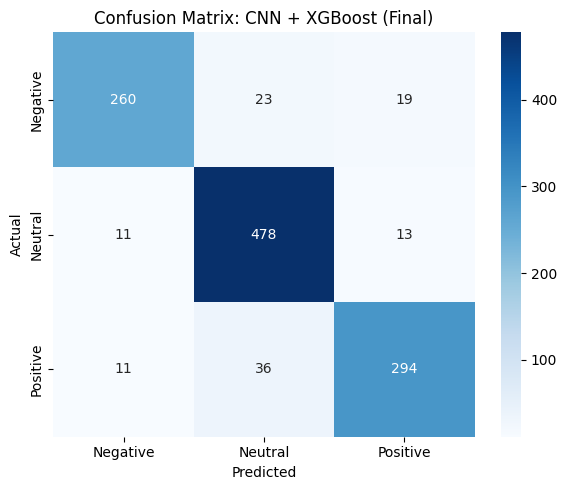

                    Model  Tuning Time (s)  Training Time (s)  Accuracy      F1                                              Notes
0  CNN + XGBoost Ensemble             8.83             256.12    0.9013  0.8974  Optuna tuning on Xgboost, CNN Keeps best param...


In [22]:
import os
import random
import numpy as np
import pandas as pd
import pickle
import optuna
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.layers import Input

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.utils.class_weight import compute_class_weight
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix

import tensorflow as tf
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Embedding, Conv1D, MaxPooling1D, Bidirectional, LSTM, Dropout, Dense
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam

from xgboost import XGBClassifier

# === Reproducibility ===
SEED = 42
os.environ['PYTHONHASHSEED'] = str(SEED)
random.seed(SEED)
np.random.seed(SEED)
tf.random.set_seed(SEED)

# === Load and prepare dataset ===
df = pd.read_csv("./AirlinesReviews/data_phase2_preprocessed.csv")
texts = df['cleaned_review'].astype(str)
labels = df['Sentiment']

# Upsample Neutral
neutral_df = df[df['Sentiment'] == 'Neutral']
df = pd.concat([df, neutral_df.sample(frac=2, replace=True, random_state=SEED)])
texts = df['cleaned_review'].astype(str)
labels = df['Sentiment']

# Encode labels
label_encoder = LabelEncoder()
labels_encoded = label_encoder.fit_transform(labels)
num_classes = len(np.unique(labels_encoded))
y = to_categorical(labels_encoded)

with open('label_encoder.pkl', 'wb') as f:
    pickle.dump(label_encoder, f)

# Compute class weights
class_weights = compute_class_weight(class_weight="balanced", classes=np.unique(labels_encoded), y=labels_encoded)
class_weight_dict = dict(enumerate(class_weights))

# === Tokenization ===
MAX_VOCAB = 10000
MAX_LEN = 200
embedding_dim = 100

tokenizer = Tokenizer(num_words=MAX_VOCAB, oov_token="<OOV>")
tokenizer.fit_on_texts(texts)
X = tokenizer.texts_to_sequences(texts)
X = pad_sequences(X, maxlen=MAX_LEN, padding='post')

with open('tokenizer.pkl', 'wb') as f:
    pickle.dump(tokenizer, f)

# === Load GloVe embeddings ===
embedding_index = {}
with open("glove/glove.6B.100d.txt", encoding='utf-8') as f:
    for line in f:
        values = line.split()
        word = values[0]
        coefs = np.asarray(values[1:], dtype='float32')
        embedding_index[word] = coefs

word_index = tokenizer.word_index
embedding_matrix = np.zeros((MAX_VOCAB, embedding_dim))
for word, i in word_index.items():
    if i < MAX_VOCAB and word in embedding_index:
        embedding_matrix[i] = embedding_index[word]

# === Split data ===
# Step 1: Train+Val and Test (90% / 10%)
X_train_val, X_test, y_train_val, y_test = train_test_split(
    X, y, test_size=0.1, stratify=np.argmax(y, axis=1), random_state=SEED
)

# Step 2: Train and Val (88.89% / 11.11% of 90%)
X_train, X_val, y_train, y_val = train_test_split(
    X_train_val, y_train_val, test_size=0.1111, stratify=np.argmax(y_train_val, axis=1), random_state=SEED
)
# === CNN + BiLSTM model with best Optuna hyperparameters ===
input_layer = Input(shape=(MAX_LEN,))
x = Embedding(MAX_VOCAB, embedding_dim, weights=[embedding_matrix], trainable=True)(input_layer)
x = Conv1D(filters=64, kernel_size=3, activation='relu')(x)
x = MaxPooling1D(pool_size=2)(x)
x = Bidirectional(LSTM(77))(x)
x = Dropout(0.3009976430455562)(x)
features = Dense(94, activation='relu', name="features")(x)  # Named layer
output_layer = Dense(num_classes, activation='softmax')(features)

model = Model(inputs=input_layer, outputs=output_layer)


model.compile(optimizer=Adam(learning_rate=0.0015082988725183591),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

start_cnn_training = time.time()
model.fit(X_train, y_train,
          epochs=13,
          batch_size=32,
          class_weight=class_weight_dict,
          verbose=1,
          shuffle=False)
end_cnn_training = time.time()
duration_cnn_training = end_cnn_training - start_cnn_training

# === Feature extraction from penultimate dense layer ===

# === Feature extraction from named intermediate layer ===
intermediate_layer_model = Model(inputs=model.input, outputs=model.get_layer("features").output)

X_train_feats = intermediate_layer_model.predict(X_train)
X_val_feats = intermediate_layer_model.predict(X_val)
X_test_feats = intermediate_layer_model.predict(X_test)

y_train_labels = np.argmax(y_train, axis=1)
y_val_labels = np.argmax(y_val, axis=1)
y_test_labels = np.argmax(y_test, axis=1)

# === Optuna tuning for XGBoost ===
def objective_xgb(trial):
    params = {
        'max_depth': trial.suggest_int('max_depth', 3, 10),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3),
        'n_estimators': trial.suggest_int('n_estimators', 50, 300),
        'subsample': trial.suggest_float('subsample', 0.5, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.5, 1.0),
        'eval_metric': 'mlogloss',
        'random_state': SEED
    }
    model = XGBClassifier(**params)
    model.fit(X_train_feats, y_train_labels)
    preds = model.predict(X_val_feats)
    return f1_score(y_val_labels, preds, average='macro')

start_xgb_tuning = time.time()
study = optuna.create_study(direction='maximize')
study.optimize(objective_xgb, n_trials=20)
end_xgb_tuning = time.time()
duration_xgb_tuning = end_xgb_tuning - start_xgb_tuning
best_params = study.best_params
print("Best XGBoost Parameters:", best_params)

# === Final XGBoost Model ===
X_final_train_feats = np.concatenate([X_train_feats, X_val_feats])
y_final_train_labels = np.concatenate([y_train_labels, y_val_labels])

start_xgb_train = time.time()
xgb_final = XGBClassifier(**best_params)
xgb_final.fit(X_final_train_feats, y_final_train_labels)
end_xgb_train = time.time()
duration_xgb_train = end_xgb_train - start_xgb_train


# === Evaluation ===
y_pred_xgb = xgb_final.predict(X_test_feats)
print("\nCNN + XGBoost Ensemble")
print("Accuracy:", accuracy_score(y_test_labels, y_pred_xgb))
print("Macro F1:", f1_score(y_test_labels, y_pred_xgb, average='macro'))
print("\nClassification Report:")
print(classification_report(y_test_labels, y_pred_xgb, target_names=label_encoder.classes_))

cm = confusion_matrix(y_test_labels, y_pred_xgb)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title("Confusion Matrix: CNN + XGBoost (Final)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()


metric = []
metric.append({
    "Model": "CNN + XGBoost Ensemble",
    "Tuning Time (s)": round(duration_xgb_tuning, 2),
    "Training Time (s)": round(duration_cnn_training + duration_xgb_train, 2),
    "Accuracy": round(accuracy_score(y_test_labels, y_pred_xgb), 4),
    "F1": round(f1_score(y_test_labels, y_pred_xgb, average='macro'), 4),
    "Notes": "Optuna tuning on Xgboost, CNN Keeps best params found before"
})

df_metric = pd.DataFrame(metric)
# Force pandas to display full width without wrapping
pd.set_option('display.max_columns', None)
pd.set_option('display.expand_frame_repr', False)  # prevents line wrapping
print(df_metric)

In [23]:

metrics.append({
    "Model": "CNN + XGBoost Ensemble",
    "Tuning Time (s)": round(duration_xgb_tuning, 2),
    "Training Time (s)": round(duration_cnn_training + duration_xgb_train, 2),
    "Accuracy": round(accuracy_score(y_test_labels, y_pred_xgb), 4),
    "F1": round(f1_score(y_test_labels, y_pred_xgb, average='macro'), 4),
    "Notes": "Optuna tuning on Xgboost, CNN Keeps best params found before"
})

df_metrics = pd.DataFrame(metrics)
# Force pandas to display full width without wrapping
pd.set_option('display.max_columns', None)
pd.set_option('display.expand_frame_repr', False)  # prevents line wrapping
print(df_metrics)

                                   Model  Tuning Time (s)  Training Time (s)  Accuracy      F1                                              Notes
0  Baseline TF-IDF + Logistic Regression             0.00               0.28    0.7864  0.7585                          Baseline model, no tuning
1                                    RNN          4410.85             650.42    0.8926  0.8903                       Optuna tuning + thresholding
2                                    CNN          3520.83             757.62    0.9109  0.9100                       Optuna tuning + thresholding
3                 CNN + XGBoost Ensemble             8.83             256.12    0.9013  0.8974  Optuna tuning on Xgboost, CNN Keeps best param...


In [24]:
# Save to CSV
df_metrics.to_csv('metrics_results.csv', index=False)

print("✅ Metrics saved to 'metrics_results.csv'")

✅ Metrics saved to 'metrics_results.csv'


To ensure a fair comparison between models, the tuning time of the CNN should be included when evaluating the total tuning time of the CNN + XGBoost Ensemble. This is because the ensemble relies on the pretrained CNN to generate features, so its performance depends on the tuning process of the CNN as well. While the XGBoost tuning adds only a small amount of extra time on top of the CNN's tuning, it's important to account for the full effort involved. Therefore, we add the CNN's tuning time to the ensemble's tuning time to reflect the total optimization effort more accurately.

In [25]:
import pandas as pd

# Load the metrics CSV
df_metrics = pd.read_csv('metrics_results.csv')

# Get CNN tuning time (row where Model == 'CNN')
cnn_tuning_time = df_metrics.loc[df_metrics['Model'] == 'CNN', 'Tuning Time (s)'].values[0]

# Add it to the CNN + XGBoost Ensemble tuning time
ensemble_index = df_metrics[df_metrics['Model'] == 'CNN + XGBoost Ensemble'].index[0]
df_metrics.at[ensemble_index, 'Tuning Time (s)'] += cnn_tuning_time

# Save updated version
df_metrics.to_csv('metrics_results.csv', index=False)


pd.set_option('display.max_columns', None)
pd.set_option('display.expand_frame_repr', False)  # prevents line wrapping
print(df_metrics)

                                   Model  Tuning Time (s)  Training Time (s)  Accuracy      F1                                              Notes
0  Baseline TF-IDF + Logistic Regression             0.00               0.28    0.7864  0.7585                          Baseline model, no tuning
1                                    RNN          4410.85             650.42    0.8926  0.8903                       Optuna tuning + thresholding
2                                    CNN          3520.83             757.62    0.9109  0.9100                       Optuna tuning + thresholding
3                 CNN + XGBoost Ensemble          3529.66             256.12    0.9013  0.8974  Optuna tuning on Xgboost, CNN Keeps best param...


To better understand the contribution of the deep learning components in the ensemble model, we conduct additional experiments using XGBoost trained on simpler feature representations: TF-IDF and averaged GloVe embeddings. 

These models serve as baselines to isolate the impact of the CNN and BiLSTM layers in the hybrid architecture. By comparing performance metrics, we can evaluate whether the improvements in the ensemble are primarily due to the power of XGBoost or the richer, context-aware features extracted by the deep learning layers. If the XGBoost models using TF-IDF or GloVe embeddings perform significantly worse than the CNN-based ensemble, it would provide strong evidence that the deep learning components play a crucial role in enhancing the model's performance.

#### TF-IDF + XGBoost

[I 2025-06-08 19:19:11,972] A new study created in memory with name: no-name-d12e9eec-6599-48f3-aa6b-cd04ea3d2d96
[I 2025-06-08 19:20:32,118] Trial 0 finished with value: 0.8529437837723507 and parameters: {'max_depth': 10, 'learning_rate': 0.08689149970061263, 'n_estimators': 128, 'subsample': 0.9116145981594141, 'colsample_bytree': 0.971658814286897}. Best is trial 0 with value: 0.8529437837723507.
[I 2025-06-08 19:20:57,044] Trial 1 finished with value: 0.8633954971329875 and parameters: {'max_depth': 7, 'learning_rate': 0.2954007883009273, 'n_estimators': 101, 'subsample': 0.7138162549863489, 'colsample_bytree': 0.6998239608345163}. Best is trial 1 with value: 0.8633954971329875.
[I 2025-06-08 19:21:32,236] Trial 2 finished with value: 0.8267746178093432 and parameters: {'max_depth': 8, 'learning_rate': 0.12034454045144463, 'n_estimators': 91, 'subsample': 0.5420782176993411, 'colsample_bytree': 0.8763267829545685}. Best is trial 1 with value: 0.8633954971329875.
[I 2025-06-08 19:2


TF-IDF + XGBoost (Upsampling Only)
Accuracy: 0.891703056768559
Macro F1-Score: 0.888204663821076

Classification Report:
               precision    recall  f1-score   support

    Negative       0.92      0.83      0.87       302
     Neutral       0.85      0.96      0.90       502
    Positive       0.94      0.84      0.89       341

    accuracy                           0.89      1145
   macro avg       0.90      0.88      0.89      1145
weighted avg       0.90      0.89      0.89      1145



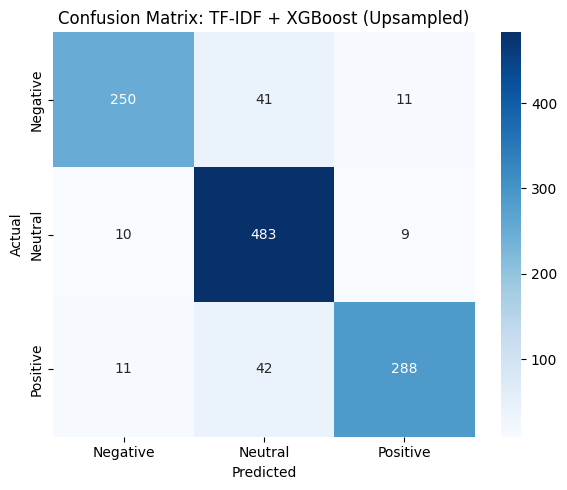

              Model  Tuning Time (s)  Training Time (s)  Accuracy      F1                                         Notes
0  TF-IDF + XGBoost           508.95             168.68    0.8917  0.8882  XGBoost with tuned hyperparameters on TF-IDF


In [36]:
import pandas as pd
import numpy as np
import random
import optuna
import time

from xgboost import XGBClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.utils.class_weight import compute_class_weight
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# === Reproducibility ===
SEED = 42
random.seed(SEED)
np.random.seed(SEED)

# === Load and prepare dataset ===
df = pd.read_csv("./AirlinesReviews/data_phase2_preprocessed.csv")

# === Upsample Neutral class ===
neutral_df = df[df['Sentiment'] == 'Neutral']
df = pd.concat([df, neutral_df.sample(frac=2, replace=True, random_state=SEED)]).reset_index(drop=True)

texts = df["cleaned_review"].astype(str)
labels = df["Sentiment"]

# === Encode labels ===
label_encoder = LabelEncoder()
labels_encoded = label_encoder.fit_transform(labels)

# === TF-IDF Vectorization ===
vectorizer = TfidfVectorizer(max_features=10000, ngram_range=(1, 2))
X_tfidf = vectorizer.fit_transform(texts)

# === Train/Test Split ===
X_train_val, X_test, y_train_val, y_test = train_test_split(
    X_tfidf, labels_encoded, test_size=0.1, stratify=labels_encoded, random_state=SEED
)

X_train, X_val, y_train, y_val = train_test_split(
    X_train_val, y_train_val, test_size=0.1111, stratify=y_train_val, random_state=SEED
)

# === Optuna Tuning ===
def objective_tfidf_xgb(trial):
    params = {
        'max_depth': trial.suggest_int('max_depth', 3, 10),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3),
        'n_estimators': trial.suggest_int('n_estimators', 50, 300),
        'subsample': trial.suggest_float('subsample', 0.5, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.5, 1.0),
        'eval_metric': 'mlogloss',
        'random_state': SEED
    }
    model = XGBClassifier(**params)
    model.fit(X_train, y_train)
    preds = model.predict(X_val)
    return f1_score(y_val, preds, average='macro')

start_tuning = time.time()
study = optuna.create_study(direction='maximize')
study.optimize(objective_tfidf_xgb, n_trials=10)
end_tuning = time.time()
duration_tuning = end_tuning - start_tuning

best_params = study.best_params
best_params['use_label_encoder'] = False

# === Train Final Model ===
X_final_train = np.vstack([X_train.toarray(), X_val.toarray()])
y_final_train = np.concatenate([y_train, y_val])

start_train = time.time()
xgb_final = XGBClassifier(**best_params)
xgb_final.fit(X_final_train, y_final_train)
end_train = time.time()
duration_train = end_train - start_train

# === Evaluate ===
y_pred = xgb_final.predict(X_test.toarray())

print("\nTF-IDF + XGBoost (Upsampling Only)")
print("Accuracy:", accuracy_score(y_test, y_pred))
macro_f1 = f1_score(y_test, y_pred, average='macro')
print("Macro F1-Score:", macro_f1)
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=label_encoder.classes_))

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title("Confusion Matrix: TF-IDF + XGBoost (Upsampled)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()

metric = [
    {
        "Model": "TF-IDF + XGBoost",
        "Tuning Time (s)": round(duration_tuning, 2),
        "Training Time (s)": round(duration_train, 2),
        "Accuracy": round(accuracy_score(y_test, y_pred), 4),
        "F1": round(macro_f1, 4),
        "Notes": "XGBoost with tuned hyperparameters on TF-IDF"
    }
]

df_metric = pd.DataFrame(metric)
pd.set_option('display.max_columns', None)
pd.set_option('display.expand_frame_repr', False)
print(df_metric)


#### GloVe Avg + XGBoost with Optuna


[I 2025-06-08 19:36:45,797] A new study created in memory with name: no-name-b7682016-00a1-4131-9211-ddef36cf1f15
[I 2025-06-08 19:36:46,600] Trial 0 finished with value: 0.8206377404688908 and parameters: {'max_depth': 3, 'learning_rate': 0.26371676546119194, 'n_estimators': 201, 'subsample': 0.7940055874564598, 'colsample_bytree': 0.6676050593582268}. Best is trial 0 with value: 0.8206377404688908.
[I 2025-06-08 19:36:51,756] Trial 1 finished with value: 0.8668988994323755 and parameters: {'max_depth': 7, 'learning_rate': 0.19431084304485327, 'n_estimators': 260, 'subsample': 0.8243962135306111, 'colsample_bytree': 0.9421862448338657}. Best is trial 1 with value: 0.8668988994323755.
[I 2025-06-08 19:36:53,274] Trial 2 finished with value: 0.7624370459784777 and parameters: {'max_depth': 5, 'learning_rate': 0.027238012737293316, 'n_estimators': 156, 'subsample': 0.7619044678700112, 'colsample_bytree': 0.7385096702428167}. Best is trial 1 with value: 0.8668988994323755.
[I 2025-06-08 1

Best XGBoost parameters (GloVe Avg): {'max_depth': 8, 'learning_rate': 0.2721857094523642, 'n_estimators': 130, 'subsample': 0.8032400106462161, 'colsample_bytree': 0.933882946504095}

GloVe Avg + XGBoost
Accuracy: 0.8873362445414847
Macro F1-Score: 0.8827076082560862

Classification Report:
               precision    recall  f1-score   support

    Negative       0.89      0.84      0.87       302
     Neutral       0.87      0.94      0.91       502
    Positive       0.91      0.84      0.87       341

    accuracy                           0.89      1145
   macro avg       0.89      0.88      0.88      1145
weighted avg       0.89      0.89      0.89      1145



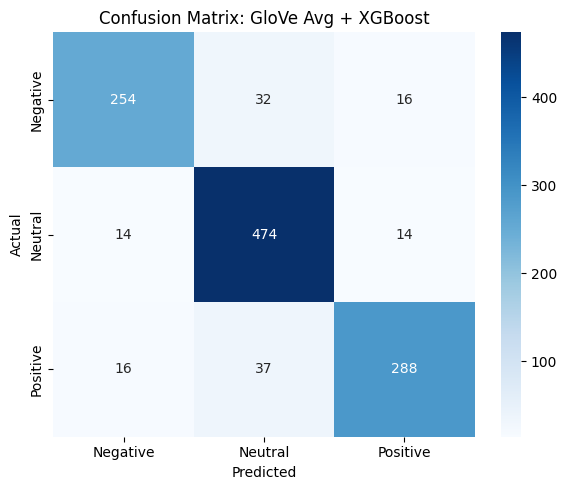

                 Model  Tuning Time (s)  Training Time (s)  Accuracy      F1                                              Notes
0  GloVe Avg + XGBoost            80.88                4.2    0.8873  0.8827  XGBoost with Optuna, using average GloVe sente...


In [38]:
import pandas as pd
import numpy as np
import random
import optuna
import time
import pickle
import matplotlib.pyplot as plt
import seaborn as sns

from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix

# === Reproducibility ===
SEED = 42
random.seed(SEED)
np.random.seed(SEED)

# === Load Data ===
df = pd.read_csv("./AirlinesReviews/data_phase2_preprocessed.csv")

# === Upsample Neutral class ===
neutral_df = df[df['Sentiment'] == 'Neutral']
df = pd.concat([df, neutral_df.sample(frac=2, replace=True, random_state=SEED)]).reset_index(drop=True)

texts = df['cleaned_review'].astype(str)
labels = df['Sentiment']


texts = df['cleaned_review'].astype(str)
labels = df['Sentiment']

# Encode labels
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(labels)

# === Tokenizer & Load GloVe Embeddings ===
with open('tokenizer.pkl', 'rb') as f:
    tokenizer = pickle.load(f)

embedding_index = {}
with open("glove/glove.6B.100d.txt", encoding='utf-8') as f:
    for line in f:
        values = line.split()
        word = values[0]
        coefs = np.asarray(values[1:], dtype='float32')
        embedding_index[word] = coefs

MAX_VOCAB = 10000
embedding_dim = 100

# === Create embedding matrix ===
embedding_matrix = np.zeros((MAX_VOCAB, embedding_dim))
for word, i in tokenizer.word_index.items():
    if i < MAX_VOCAB and word in embedding_index:
        embedding_matrix[i] = embedding_index[word]

# === Function to compute sentence-level average embedding ===
def average_glove_vector(text):
    tokens = tokenizer.texts_to_sequences([text])[0]
    valid_embeddings = [embedding_matrix[token] for token in tokens if token < MAX_VOCAB and token != 0]
    if valid_embeddings:
        return np.mean(valid_embeddings, axis=0)
    else:
        return np.zeros(embedding_dim)

# === Build feature matrix ===
X_glove_avg = np.array([average_glove_vector(text) for text in texts])

# === Train/test split ===
X_train_val, X_test, y_train_val, y_test = train_test_split(X_glove_avg, y, test_size=0.1, stratify=y, random_state=SEED)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.1111, stratify=y_train_val, random_state=SEED)


# === Optuna tuning for XGBoost ===
def objective_glove_xgb(trial):
    params = {
        'max_depth': trial.suggest_int('max_depth', 3, 10),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3),
        'n_estimators': trial.suggest_int('n_estimators', 50, 300),
        'subsample': trial.suggest_float('subsample', 0.5, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.5, 1.0),
        'eval_metric': 'mlogloss',
        'random_state': SEED
    }
    model = XGBClassifier(**params)
    model.fit(X_train, y_train)
    preds = model.predict(X_val)
    return f1_score(y_val, preds, average='macro')

start_tuning = time.time()
study = optuna.create_study(direction='maximize')
study.optimize(objective_glove_xgb, n_trials=20)
end_tuning = time.time()
duration_tuning = end_tuning - start_tuning

best_params = study.best_params
print("Best XGBoost parameters (GloVe Avg):", best_params)

# === Final model training ===
X_final_train = np.vstack([X_train, X_val])
y_final_train = np.concatenate([y_train, y_val])

start_train = time.time()
xgb_final = XGBClassifier(**best_params)
xgb_final.fit(X_final_train, y_final_train)
end_train = time.time()
duration_train = end_train - start_train

# === Evaluation ===
y_pred = xgb_final.predict(X_test)

print("\nGloVe Avg + XGBoost")
print("Accuracy:", accuracy_score(y_test, y_pred))
macro_f1 = f1_score(y_test, y_pred, average='macro')
print("Macro F1-Score:", macro_f1)
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=label_encoder.classes_))

# === Confusion matrix ===
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title("Confusion Matrix: GloVe Avg + XGBoost")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()

# === Append metrics ===
metric = []
metric.append({
    "Model": "GloVe Avg + XGBoost",
    "Tuning Time (s)": round(duration_tuning, 2),
    "Training Time (s)": round(duration_train, 2),
    "Accuracy": round(accuracy_score(y_test, y_pred), 4),
    "F1": round(macro_f1, 4),
    "Notes": "XGBoost with Optuna, using average GloVe sentence embeddings"
})

df_metric = pd.DataFrame(metric)

pd.set_option('display.max_columns', None)
pd.set_option('display.expand_frame_repr', False)
print(df_metric)
